In [38]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def file_path(question, ext):
    """
    This Function will be used to specify the csv file of the imported database
    ----
    Parameters :
    1. questions : String -> This is the Question that will be promt user to input file
    2. extension : String -> Allowed file extension, in this case is csv
    """
    while True:
        try:
            file = Path(input(question))
            if file.exists() and file.is_file and file.suffix in ext:
                return file
        except:
            print('File not suitable, please retry')

## INPUT Dataset
MOD Data Historical from 2022 to 2025

In [58]:
csv = file_path('Masukkan File CSV  : ','.csv')
dataset = pd.read_csv(csv)
dataset


Masukkan File CSV  :  CMDData_PandasAnumA.csv


,Year,OB (Bcm),Coal (Ton),Distance OB (KM),Distance Coal (KM),Fuel
0,2022,204377284,22102635,4.01,13.45,390255547
1,2023,231045341,25194838,4.36,14.16,430580106
2,2024,201888642,24600060,3.82,15.31,326415275
3,2025,188200000,24499939,3.36,16.27,306036621


## Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.
To perform a quick linearity check, we can use scatter diagrams (utilizing the matplotlib library).

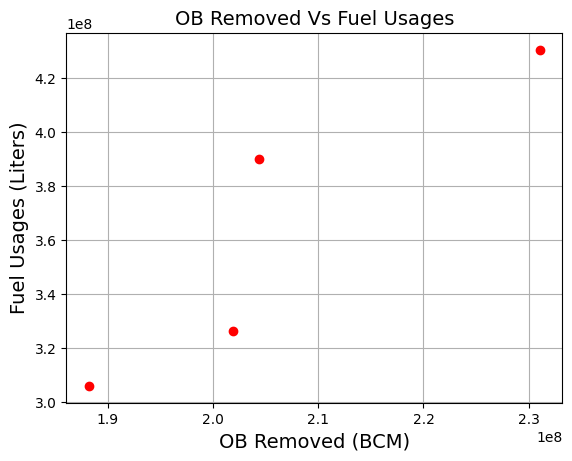

In [59]:
plt.scatter(dataset['OB (Bcm)'], dataset['Fuel'], color='red')
plt.title('OB Removed Vs Fuel Usages', fontsize=14)
plt.xlabel('OB Removed (BCM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

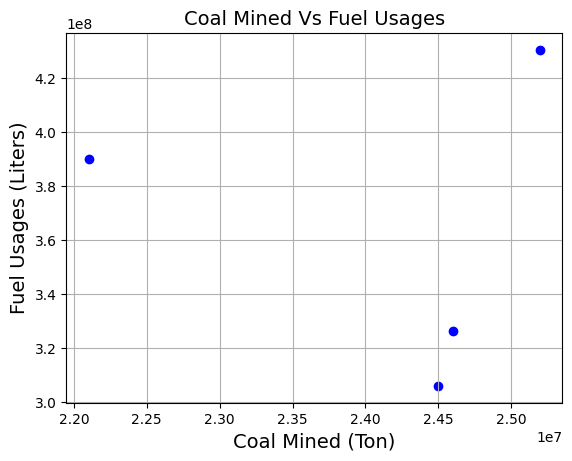

In [60]:
plt.scatter(dataset['Coal (Ton)'], dataset['Fuel'], color='blue')
plt.title('Coal Mined Vs Fuel Usages', fontsize=14)
plt.xlabel('Coal Mined (Ton)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

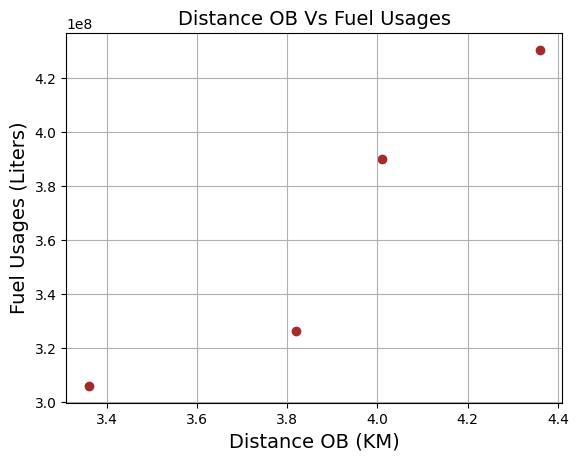

In [61]:
plt.scatter(dataset['Distance OB (KM)'], dataset['Fuel'], color='brown')
plt.title('Distance OB Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance OB (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

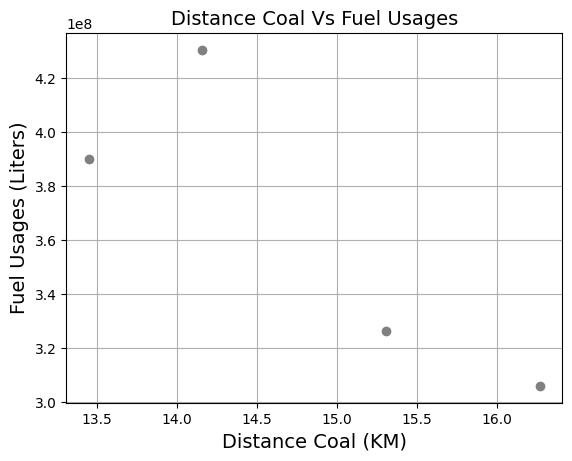

In [62]:
plt.scatter(dataset['Distance Coal (KM)'], dataset['Fuel'], color='gray')
plt.title('Distance Coal Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance Coal (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

## From Linearity test above we found that OB Removed, and Coal (Ton) have linier relantionship with Fuel Usages

In [63]:
dataset = dataset.drop(['Year'], axis=1)

In [64]:
correlations = dataset.corr()
correlations['Fuel'].round(2)

OB (Bcm)              0.91
Coal (Ton)           -0.09
Distance OB (KM)      0.94
Distance Coal (KM)   -0.85
Fuel                  1.00
Name: Fuel, dtype: float64

## From Corelation above 
We found that OB, Coal & Distance OB have corelation to Fuel, which have corelation point >= 0.2

In [65]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut
import statsmodels.api as sm
import seaborn as sns

## Features & Target
Features (x) : Independent Variables = OB and Coal
Target (y) : Dependent Variable = Fuel

## Features & Target
Features (x) : Independent Variables = OB and Coal
Target (y) : Dependent Variable = Fuel

In [66]:
x = dataset[['OB (Bcm)','Distance OB (KM)']]
y = dataset['Fuel']
 
# Split dataset (70% Train, 30% Test) For Evaluation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [67]:
# ==============================
# Linear Regression (sklearn)
# ==============================
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predictions
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [69]:
# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-Validation (2-fold)
#kf = KFold(n_splits=1, shuffle=True, random_state=42)
#loo = LeaveOneOut()
#cv_scores = cross_val_score(regr, X_train, y_train, cv=kf, scoring='r2')

# Print Results
print("\n Model Performance Metrics:")
print(f"Train MSE: {train_mse:.3f} | Test MSE: {test_mse:.3f}")
print(f"Train MAE: {train_mae:.3f} | Test MAE: {test_mae:.3f}")
print(f"Train R² Score: {train_r2:.3f} | Test R² Score: {test_r2:.3f}")

#print("\n Cross-Validation Results:")
#print(f"R² Scores for each fold: {cv_scores.round(3)}")
#print(f"Mean R² Score: {cv_scores.mean():.3f} | Std Dev: {cv_scores.std():.3f}")


 Model Performance Metrics:
Train MSE: 0.000 | Test MSE: 95723748116005232.000
Train MAE: 0.000 | Test MAE: 309392546.963
Train R² Score: 1.000 | Test R² Score: nan


C:\Users\yudhia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [70]:
# ==============================
# Linear Regression (statsmodels)
# ==============================
regr = linear_model.LinearRegression()
regr.fit(x, y)
print("Final Model Intercept:", regr.intercept_.round(3))
print("Final Model Coefficients:", regr.coef_.round(3))

X_const = sm.add_constant(x)  # Add constant for intercept
model = sm.OLS(y, X_const).fit()
print("\n📌 Statsmodels Regression Summary:")
print(model.summary())

Final Model Intercept: -163489282.974
Final Model Coefficients: [4.44000000e-01 1.11935449e+08]

📌 Statsmodels Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                   Fuel   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     4.185
Date:                Thu, 10 Jul 2025   Prob (F-statistic):              0.327
Time:                        15:42:22   Log-Likelihood:                -72.089
No. Observations:                   4   AIC:                             150.2
Df Residuals:                       1   BIC:                             148.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0

C:\Users\yudhia\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define features (exclude 'Fuel' since it's the target variable)
features = ['OB (Bcm)','Distance OB (KM)','Distance Coal (KM)']
X = dataset[features]  

# Add a constant column for intercept
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

              Feature          VIF
0               const  3806.210953
1            OB (Bcm)    39.020965
2    Distance OB (KM)    72.190886
3  Distance Coal (KM)    11.434443


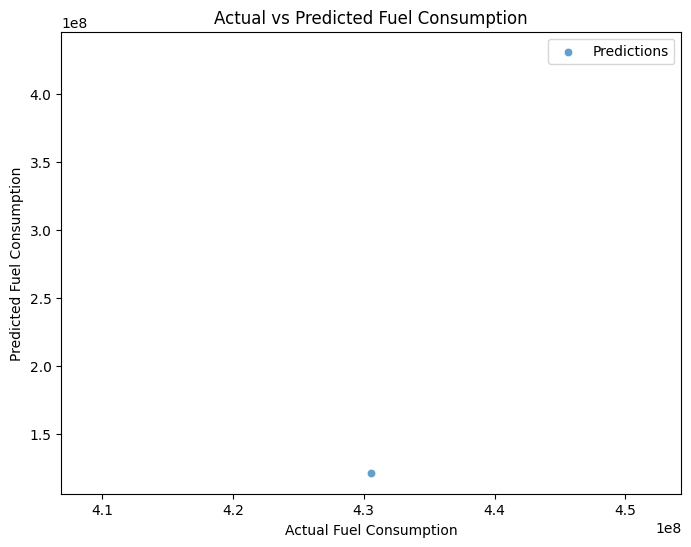

In [72]:
# ==============================
# Plot: Actual vs Predicted
# ==============================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs Predicted Fuel Consumption")
plt.legend()
plt.show()